<a href="https://colab.research.google.com/github/Greqorian/IKEA_Products_Recognition_AI/blob/main/Copy_of_IKEA_Products_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 


In [23]:
# package imports
#basics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json # json files

#visualisation
from matplotlib import pyplot as plt
#fastai
import torch
from fastai.vision.all import *
from fastai.vision.augment import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages/5-furniture-imagesList.json', "r")
# a dictionary
uniqueList = json.load(f)

In [26]:
df = pd.json_normalize(uniqueList)

In [27]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages')

In [28]:
df['index'] = df.index

In [29]:
df['title'] = df['index'].astype(str) +'_'+ df['id'] +'_'+ df['title'] +'.jpg'
# df['title'] = df['title'].apply(lambda x: os.path.join(train_path, x))
df

,id,name,title,category,group,subgroup,src,index
0,60510640,JÄRVFJÄLLET,0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1009906_pe827773_s5.jpg?f=s,0
1,60510640,JÄRVFJÄLLET,1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1030806_pe836390_s5.jpg?f=s,1
2,60510640,JÄRVFJÄLLET,2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1030807_pe836391_s5.jpg?f=s,2
3,60510640,JÄRVFJÄLLET,3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1030812_pe836392_s5.jpg?f=s,3
4,60510640,JÄRVFJÄLLET,4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__0853719_pe683148_s5.jpg?f=s,4
5,60510640,JÄRVFJÄLLET,5_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__0853726_pe683149_s5.jpg?f=s,5
6,60510640,JÄRVFJÄLLET,6_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__0607675_pe683114_s5.jpg?f=s,6
7,60510640,JÄRVFJÄLLET,7_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__0798218_ph165601_s5.jpg?f=s,7
8,60510640,JÄRVFJÄLLET,8_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,Furniture,Chairs,Desk chairs,https://www.ikea.com/us/en/images/products/jaervfjaellet-office-chair-with-armrests__1045864_pe842743_s5.jpg?f=s,8
9,49324512,ÄPPLARÖ,9_49324512_ÄPPLARÖ_Table_and_4_folding_chairs_outdoor_-_brown_stained-Frösön-Duvholmen_dark_gray.jpg,Furniture,Patio furniture,Outdoor dining sets,https://www.ikea.com/us/en/images/products/aepplaroe-table-and-4-folding-chairs-outdoor-brown-stained-froesoen-duvholmen-dark-gray__0940273_pe794906_s5.jpg?f=s,9


In [30]:
df = df.drop(columns=['id', 'category', 'group', 'subgroup', 'src', 'index'])
df = df[['title', 'name' ]]
df

,title,name
0,0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
1,1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
2,2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
3,3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
4,4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
5,5_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
6,6_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
7,7_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
8,8_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg,JÄRVFJÄLLET
9,9_49324512_ÄPPLARÖ_Table_and_4_folding_chairs_outdoor_-_brown_stained-Frösön-Duvholmen_dark_gray.jpg,ÄPPLARÖ


In [33]:
print(df.head(5)[df.columns[0:4]])
path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages/train'

                                                   title         name
0  0_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
1  1_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
2  2_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
3  3_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET
4  4_60510640_JÄRVFJÄLLET_Office_chair_with_armrests.jpg  JÄRVFJÄLLET


In [38]:
img_size = 128
augmentations = [
        Rotate(10, p=0.4, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
        Contrast(max_lighting=0.4, p=0.5),
        RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.5),
        Zoom(max_zoom=1,p=0.5),
        RandomResizedCrop(img_size)
    ]
dls = ImageDataLoaders.from_df(df=df,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               batch_tfms=augmentations, 
                               item_tfms=Resize(img_size))

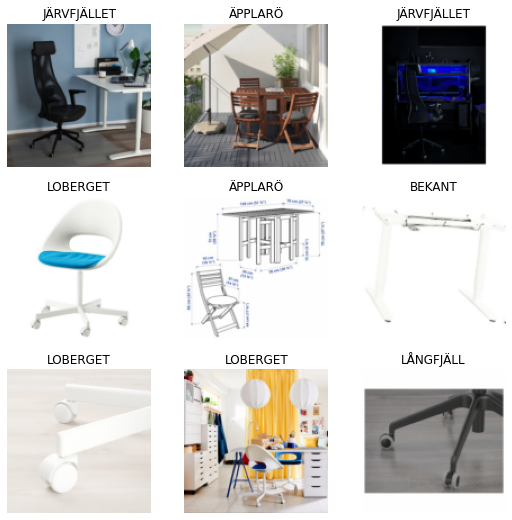

In [39]:
dls.show_batch()

In [40]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy,error_rate])

SuggestedLRs(valley=0.0010000000474974513)

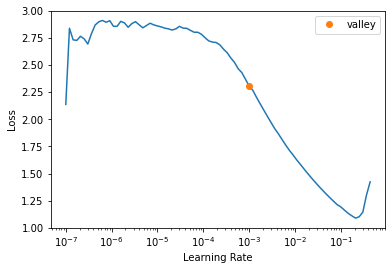

In [41]:
learn.lr_find()